***Dataset link :*** https://drive.google.com/file/d/1zuRH1L8jyoY4JkNw_tHV98SyOen15a2v/view?usp=sharing

***Colab Link :*** https://colab.research.google.com/drive/1CquAN4GS_a8FKc3sX6i7KX15DCZA27ZC?usp=sharing


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/heart.csv')

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


age - the age of the patient in years

sex - the sex of the patient(1= male, 0=female)

cp - the type of chest pain the patient has experienced (1=typical angina, 2=atypical angina, 3=non-anginal pain, 4=asymptomatic)

trestbps - the resting blood pressure of the patient in mm Hg.

chol - the serum cholestrol level of the patient in mg/dl.

fbs - the fasting blood sugar level of the patient, measured in mg/dl(1=high, 0=low)

restecg - the resting electrocardiographic results of the patient (0=normal, 1=ST-T wave abnormality, 2=left ventriculur hypertrophy)

thalach = the maximum heart rate achienved by the patient during excercise.

oldpeak - the ST depression induced by excercise relative to rest. slope: the slope of ST segment during peak excercise(1= upsloping, 2=flat, 3=downsloping)

ca - the number of major vessels coloured by flouroscopy(0-3).

thal - the type of thallium scan performed on the patient (1=fixed defect, 2=reversible defect, 3= normal)

target - the presence of heart disease in the patient(0=no disease, 1=disease present).



In [ ]:
df.shape

(303, 14)

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
df.duplicated().sum()

np.int64(1)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['target'].unique()

array([1, 0])

In [ ]:
df['target'].nunique()

2

In [ ]:
df['target'].value_counts()

,count
target,
1,164
0,138


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [ ]:
col = list(df.columns)

In [ ]:
col

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [ ]:
df.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


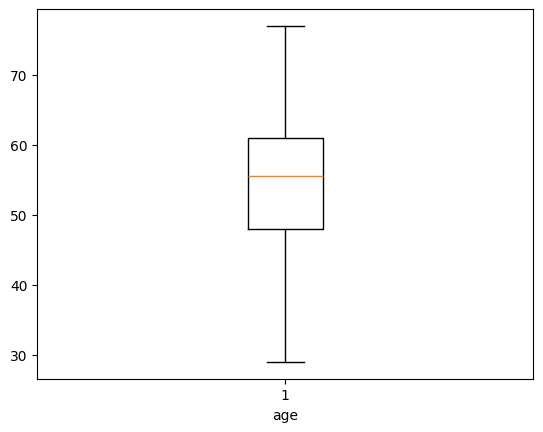

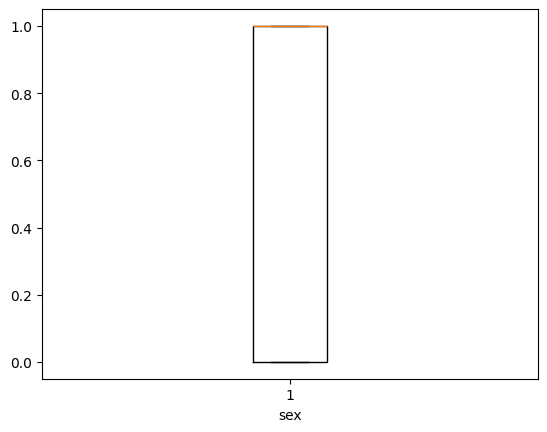

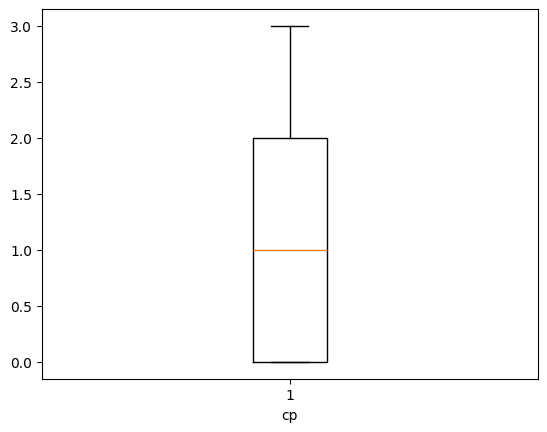

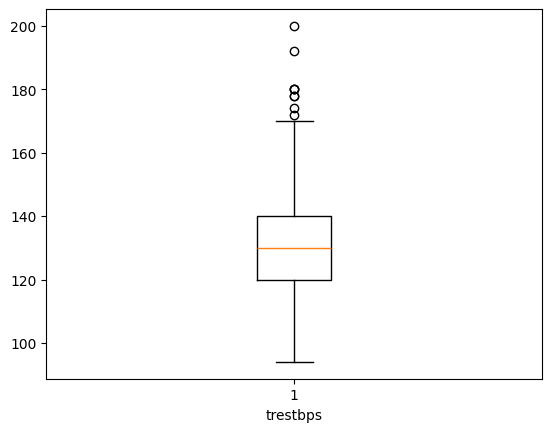

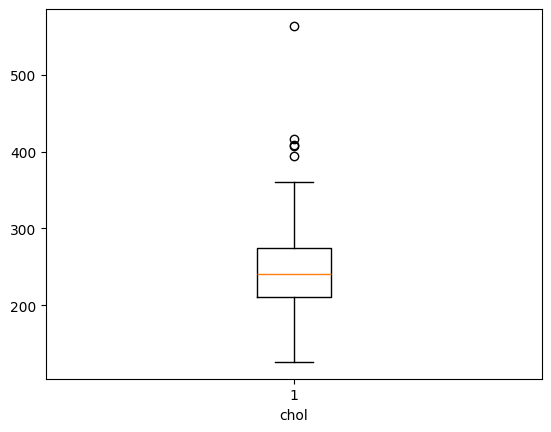

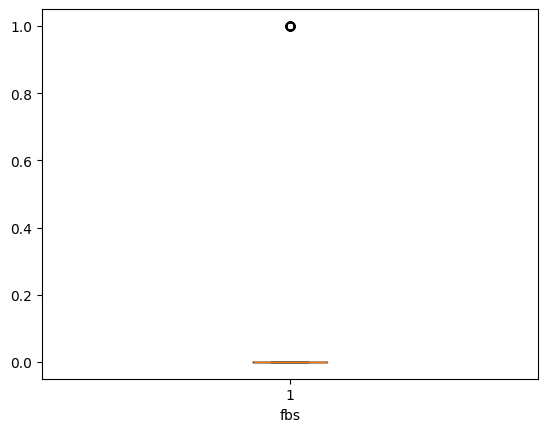

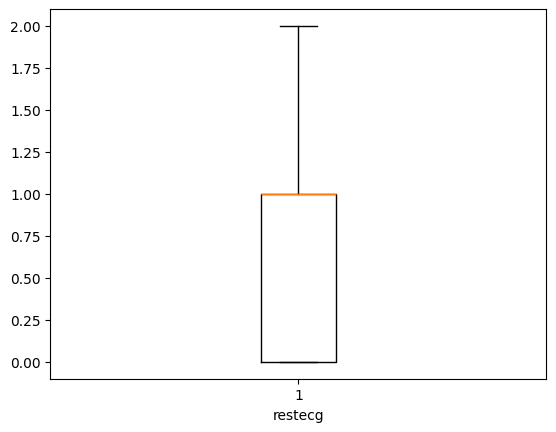

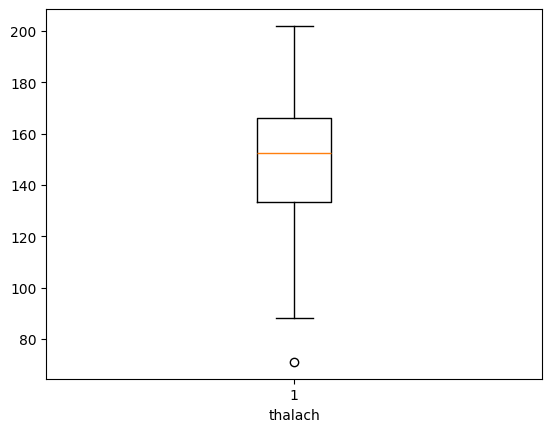

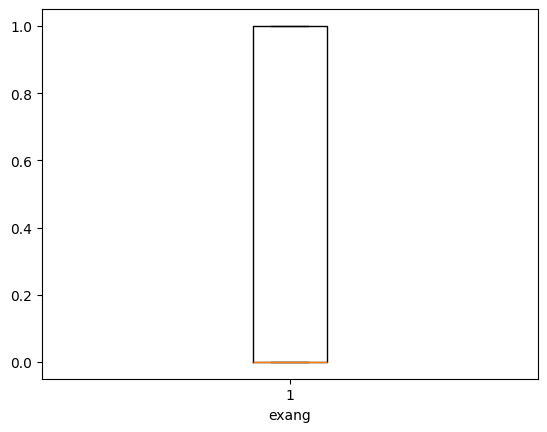

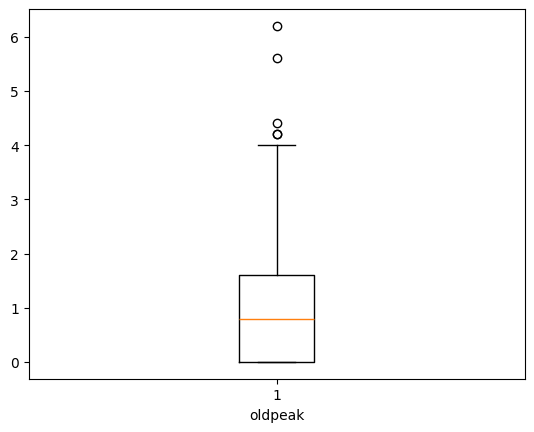

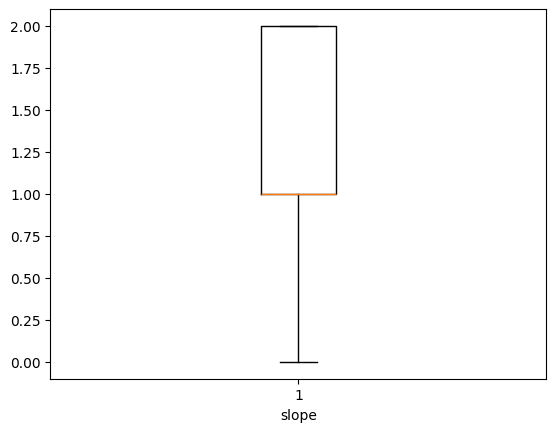

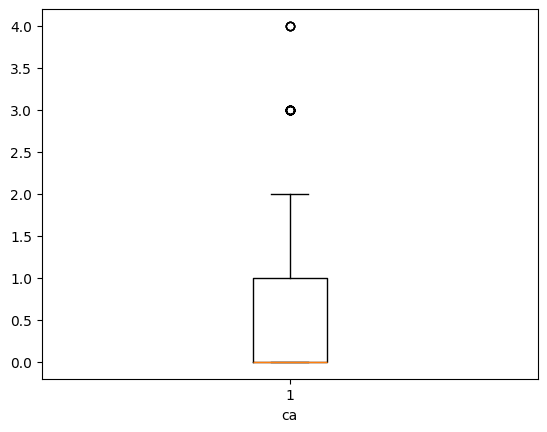

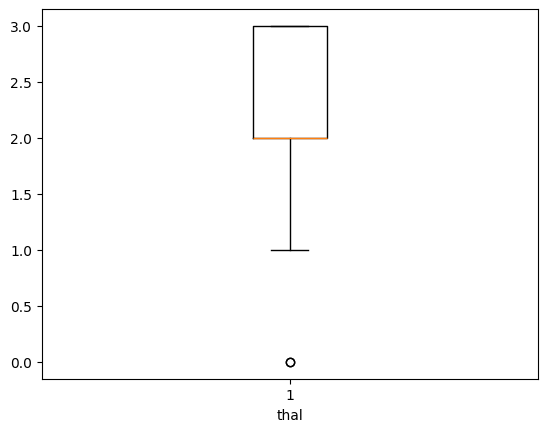

In [ ]:
for i in col:
  if(i!='target'):
    plt.boxplot(df[i])
    plt.xlabel(i)
    plt.show()

In [ ]:
df.shape

(302, 14)

<Axes: >

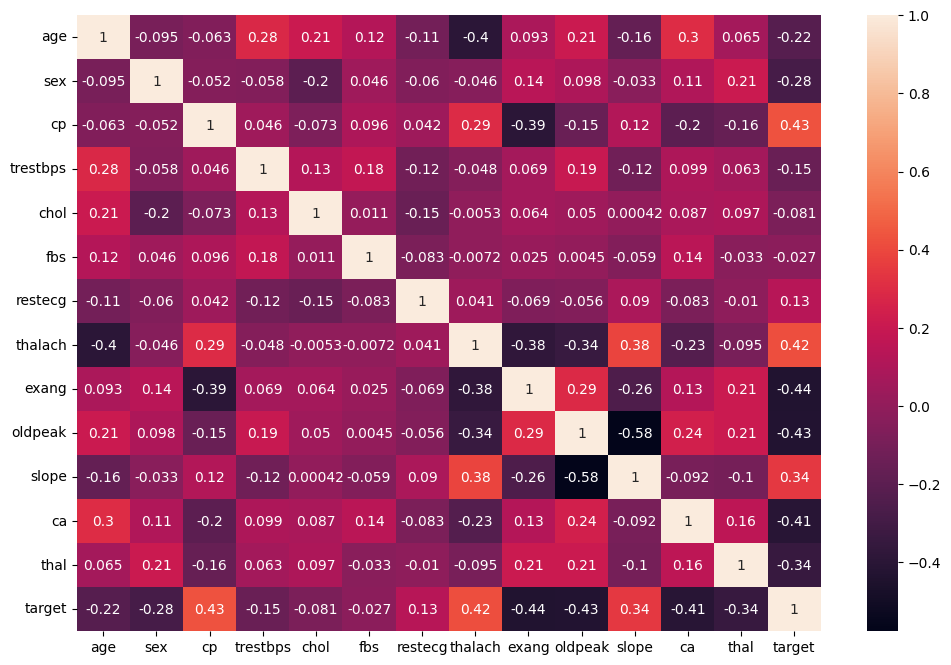

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [ ]:
# import the libraries fir splitting, testing, evaluate the model for accuracy and also load the decision tree library
# divide the data into training and testing x and y


In [ ]:
from sklearn.model_selection import train_test_split  # splitting the data in training and testing
from sklearn.metrics import accuracy_score, confusion_matrix   # to evaluate the model performance
from sklearn.tree import DecisionTreeClassifier  # load model library

In [ ]:
# divide the data into training and testing

x = df.drop(columns=['target'],axis=1)  # we are taking all the columns except the target, while droping a column it will use axis=1
                                        # if you are manupultaing the data with respect to rows it will use axis =0

y= df['target']

In [ ]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
y

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x,y,train_size=0.8, random_state=0)

In [ ]:
model=DecisionTreeClassifier()

In [ ]:
model.fit(x_train,y_train)  # asking the model to learn the pattern

DecisionTreeClassifier()

In [ ]:
y_predict = model.predict(x_test)

In [ ]:
y_predict

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
accuracy_score(y_predict,y_test)*100

78.68852459016394

In [ ]:
confusion_matrix(y_predict,y_test)

array([[22,  8],
       [ 5, 26]])